<a href="https://colab.research.google.com/github/syedamaann/cryptocurrency-scraping-and-analysis/blob/main/scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

<a id="1"></a>
# 1. Extraction

<a id="1.1"></a>
## 1.1. Initializing Crypto Data Lists and Creating DataFrame

In [2]:
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_voulume_24hr_list = []
crypto_pct_1hr_list = []
crypto_pct_24hr_list = []
crypto_pct_7day_list = []

df = pd.DataFrame()

<a id="1.2"></a>
## 1.2. Function: Scrape Date List from CoinMarketCap

In [7]:
scrape_date_list = []

def scrape_date():
    url = 'https://coinmarketcap.com/historical/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    a_tags = soup.find_all('a', class_='historical-link cmc-link')
    for tag in a_tags:
        href = tag.get('href')
        scrape_date_list.append(href)

scrape_date()
print(f'Historical data for {(len(scrape_date_list))} Sundays since May 2013 is available for scraping from CoinMarketCap.')

Historical data for 575 Sundays since May 2013 is available for scraping from CoinMarketCap.


<a id="1.3"></a>
## 1.3. Function: Scrape Cryptocurrency Data for a Specific Date

In [8]:
def scrape_data(date):
    url = 'https://coinmarketcap.com' + date
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
    count = 0
    for row in tr:
        if count == 10:
            break
        count += 1

        try:
            crypto_date = date
        except AttributeError:
            crypto_date = None

        try:
            name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()
        except AttributeError:
            crypto_name = None

        try:
            crypto_symbol = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol'}).text.strip()
        except AttributeError:
            crypto_symbol = None

        try:
            crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
        except AttributeError:
            crypto_market_cap = None

        try:
            crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
        except AttributeError:
            crypto_price = None

        try:
            crypto_circulating_supply = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip().split(' ')[0]
        except AttributeError:
            crypto_circulating_supply = None

        try:
            crypto_voulume_24hr_td = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'})
            crypto_voulume_24hr = crypto_voulume_24hr_td.find('a', attrs={'class': 'cmc-link'}).text.strip()
        except AttributeError:
            crypto_voulume_24hr = None

        try:
            crypto_pct_1hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
        except AttributeError:
            crypto_pct_1hr = None

        try:
            crypto_pct_24hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
        except AttributeError:
            crypto_pct_24hr = None

        try:
            crypto_pct_7day = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()
        except AttributeError:
            crypto_pct_7day = None

        crypto_date_list.append(crypto_date)
        crypto_name_list.append(crypto_name)
        crypto_symbol_list.append(crypto_symbol)
        crypto_market_cap_list.append(crypto_market_cap)
        crypto_price_list.append(crypto_price)
        crypto_circulating_supply_list.append(crypto_circulating_supply)
        crypto_voulume_24hr_list.append(crypto_voulume_24hr)
        crypto_pct_1hr_list.append(crypto_pct_1hr)
        crypto_pct_24hr_list.append(crypto_pct_24hr)
        crypto_pct_7day_list.append(crypto_pct_7day)

<a id="1.4"></a>
## 1.4 Scraping Cryptocurrency Data for Multiple Dates

In [11]:
from datetime import datetime

date_format = "%Y%m%d"

# Split and convert the start date and end date
start_date = datetime.strptime(scrape_date_list[0].split('/')[-2], date_format).strftime('%Y-%m-%d')
end_date = datetime.strptime(scrape_date_list[-1].split('/')[-2], date_format).strftime('%Y-%m-%d')
print(f'There are {len(scrape_date_list)} Sundays between {start_date} and {end_date}.')


for i in range(len(scrape_date_list)):
    scrape_data(scrape_date_list[i])
    print("completed: " + str(i+1) + " out of " + str(len(scrape_date_list)))

There are 575 Sundays between 2013-04-28 and 2024-04-28.
completed: 1 out of 575
completed: 2 out of 575
completed: 3 out of 575
completed: 4 out of 575
completed: 5 out of 575
completed: 6 out of 575
completed: 7 out of 575
completed: 8 out of 575
completed: 9 out of 575
completed: 10 out of 575
completed: 11 out of 575
completed: 12 out of 575
completed: 13 out of 575
completed: 14 out of 575
completed: 15 out of 575
completed: 16 out of 575
completed: 17 out of 575
completed: 18 out of 575
completed: 19 out of 575
completed: 20 out of 575
completed: 21 out of 575
completed: 22 out of 575
completed: 23 out of 575
completed: 24 out of 575
completed: 25 out of 575
completed: 26 out of 575
completed: 27 out of 575
completed: 28 out of 575
completed: 29 out of 575
completed: 30 out of 575
completed: 31 out of 575
completed: 32 out of 575
completed: 33 out of 575
completed: 34 out of 575
completed: 35 out of 575
completed: 36 out of 575
completed: 37 out of 575
completed: 38 out of 575
co

In [14]:
df['Date'] = crypto_date_list
df['Name'] = crypto_name_list
df['Symbol'] = crypto_symbol_list
df['Market Cap'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Volume (24hr)'] = crypto_voulume_24hr_list
df['% 1h'] = crypto_pct_1hr_list
df['% 24h'] = crypto_pct_24hr_list
df['% 7d'] = crypto_pct_7day_list

df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,/historical/20130428/,Bitcoin,BTC,"$1,488,566,971.96",$134.21,"11,091,325",None,0.64%,--,--
1,/historical/20130428/,Litecoin,LTC,"$74,637,021.57",$4.3484,"17,164,230",None,0.80%,--,--
2,/historical/20130428/,Peercoin,PPC,"$7,250,186.65",$0.3865,"18,757,362",None,-0.93%,--,--
3,/historical/20130428/,Namecoin,NMC,"$5,995,997.19",$1.1072,"5,415,300",None,-0.05%,--,--
4,/historical/20130428/,Terracoin,TRC,"$1,503,099.40",$0.6469,"2,323,570",None,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5742,/historical/20240428/,USDC,USDC,"$33,500,196,524.88",$1.0001,"33,498,062,143","$4,003,587,751.21",<0.01%,<0.01%,<0.01%
5743,/historical/20240428/,XRP,XRP,"$28,191,139,575.10",$0.5104,"55,235,913,166","$580,872,465.54",-0.50%,-1.43%,-2.73%
5744,/historical/20240428/,Dogecoin,DOGE,"$21,135,889,677.02",$0.1467,"144,076,586,384","$638,063,323.97",-0.71%,-0.69%,-7.30%
5745,/historical/20240428/,Toncoin,TON,"$18,830,976,699.79",$5.4230,"3,472,455,536","$125,234,664.01",-0.75%,0.44%,-11.74%


### DataFrame Information Before Transformation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                5747 non-null   object
 1   Name                5747 non-null   object
 2   Symbol              5747 non-null   object
 3   Market Cap          5747 non-null   object
 4   Price               5747 non-null   object
 5   Circulating Supply  5747 non-null   object
 6   Volume (24hr)       5400 non-null   object
 7   % 1h                5747 non-null   object
 8   % 24h               5747 non-null   object
 9   % 7d                5747 non-null   object
dtypes: object(10)
memory usage: 449.1+ KB


<a id="2"></a>
# 2. Transformation

<a id="2.1"></a>
## 2.1. Data Cleaning and Formatting

In [23]:
# Extract the date component from the 'Date' column and convert it to a datetime data type
df['Date'] = pd.to_datetime(df['Date'].str.split('/').str[-2], format='%Y%m%d')

# Replace the dollar signs ($) and commas (,) from the 'Market Cap' and 'Price' columns
df['Market Cap'] = df['Market Cap'].str.replace('[$,]', '', regex=True)
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True)

# Replace the commas (,) from the 'Circulating Supply' column
df['Circulating Supply'] = df['Circulating Supply'].str.replace(',', '')

# Replace the dollar signs ($) and commas (,) from the 'Volume (24hr)' columns
df['Volume (24hr)'] = df['Volume (24hr)'].str.replace('[$,]', '', regex=True)

# Replace the unchange sign (--), the smaller sign (<), the larger sign (>) and percentage sign (%) from the '% 1h', '% 24h', and '% 7d' columns
df['% 1h'] = df['% 1h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 24h'] = df['% 24h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 7d'] = df['% 7d'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')

# Convert the numeric columns to appropriate data types, replacing invalid values with NaN
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x))

# Handle specific case of "<0.01" by replacing it with a small non-zero value, e.g., 0.005
df.loc[df['% 1h'] < 0, '% 1h'] = 0.005

# Set the display format for float and integer values
pd.options.display.float_format = '{:.2f}'.format

# Display the updated DataFrame
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325,NaN,0.64,NaN,NaN
1,2013-04-28,Litecoin,LTC,74637021.57,4.35,17164230,NaN,0.80,NaN,NaN
2,2013-04-28,Peercoin,PPC,7250186.65,0.39,18757362,NaN,0.01,NaN,NaN
3,2013-04-28,Namecoin,NMC,5995997.19,1.11,5415300,NaN,0.01,NaN,NaN
4,2013-04-28,Terracoin,TRC,1503099.40,0.65,2323570,NaN,0.61,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5742,2024-04-28,USDC,USDC,33500196524.88,1.00,33498062143,4003587751.21,0.01,0.01,0.01
5743,2024-04-28,XRP,XRP,28191139575.10,0.51,55235913166,580872465.54,0.01,-1.43,-2.73
5744,2024-04-28,Dogecoin,DOGE,21135889677.02,0.15,144076586384,638063323.97,0.01,-0.69,-7.30
5745,2024-04-28,Toncoin,TON,18830976699.79,5.42,3472455536,125234664.01,0.01,0.44,-11.74


<a id="2.2"></a>
## 2.2. Missing Value Imputation and Reverse Normalization

To handle missing values in the "Volume (24hr)" column, K-Nearest Neighbors (KNN) imputation can be used. It offers greater accuracy than mean or median imputation but is more computationally intensive.

In [24]:
# Check for missing data
df.isnull().sum()

Date                    0
Name                    0
Symbol                  0
Market Cap              0
Price                   0
Circulating Supply      0
Volume (24hr)         347
% 1h                    0
% 24h                  18
% 7d                   26
dtype: int64

In [26]:
# Select numerical columns for imputation
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', '% 1h', '% 24h', '% 7d', 'Volume (24hr)']

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_normalized.copy()
df_imputed[numeric_cols] = imputer.fit_transform(df_normalized[numeric_cols])

# Reverse normalization
df_imputed[numeric_cols] = scaler.inverse_transform(df_imputed[numeric_cols])

df = df_imputed.copy()
df


,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325.00,182711332.42,0.64,-1.58,-5.11
1,2013-04-28,Litecoin,LTC,74637021.57,4.35,17164230.00,661930.26,0.80,-3.10,37.64
2,2013-04-28,Peercoin,PPC,7250186.65,0.39,18757362.00,22985.23,0.01,-1.29,-6.22
3,2013-04-28,Namecoin,NMC,5995997.19,1.11,5415300.00,70215.92,0.01,2.39,4.86
4,2013-04-28,Terracoin,TRC,1503099.40,0.65,2323570.00,115720.92,0.61,-1.76,26.21
...,...,...,...,...,...,...,...,...,...,...
5742,2024-04-28,USDC,USDC,33500196524.88,1.00,33498062143.00,4003587751.21,0.01,0.01,0.01
5743,2024-04-28,XRP,XRP,28191139575.10,0.51,55235913166.00,580872465.54,0.01,-1.43,-2.73
5744,2024-04-28,Dogecoin,DOGE,21135889677.02,0.15,144076586384.00,638063323.97,0.01,-0.69,-7.30
5745,2024-04-28,Toncoin,TON,18830976699.79,5.42,3472455536.00,125234664.01,0.01,0.44,-11.74


### DataFrame Information After Transformation

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5747 non-null   datetime64[ns]
 1   Name                5747 non-null   object        
 2   Symbol              5747 non-null   object        
 3   Market Cap          5747 non-null   float64       
 4   Price               5747 non-null   float64       
 5   Circulating Supply  5747 non-null   float64       
 6   Volume (24hr)       5747 non-null   float64       
 7   % 1h                5747 non-null   float64       
 8   % 24h               5747 non-null   float64       
 9   % 7d                5747 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 449.1+ KB


note:
- No data is available for April 28, 2013, marking the start of the cryptocurrency market.
- Data for the "Volume (24hr)" column is unavailable before December 22, 2013.

<a id="3"></a>
# 3. Loading

In [28]:
# Save the DataFrame as a CSV file
df.to_csv('output.csv', index=False)

<a id="4"></a>
# 4. Data Analysis

In [29]:
df = pd.read_csv('output.csv')

<a id="4.1"></a>
## 4.1 Time Series Analysis
To analyze Bitcoin’s historical data, focusing on price, market cap, and trading volume trends over time. The aim is to derive insights and guide future predictions and decisions.

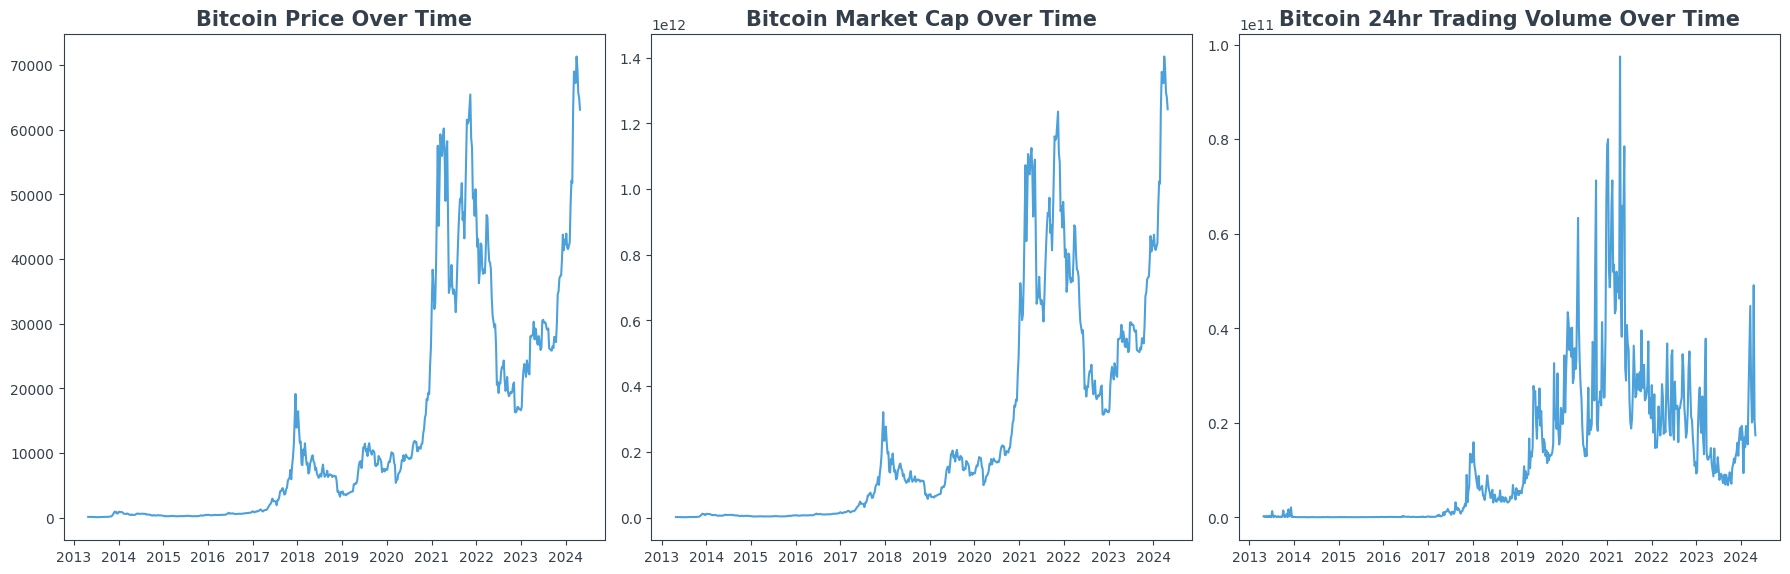

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming df is your DataFrame and has been properly imported.

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Bitcoin
btc_data = df[df['Symbol'] == 'BTC']

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# Create subplots arranged side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjusting the figsize and layout for side-by-side arrangement

# Plot 'Price' over time
axs[0].plot(btc_data['Date'], btc_data['Price'], color='#007acc', alpha=0.7)
axs[0].set_title('Bitcoin Price Over Time', fontsize=15, fontweight='black', color='#333F4B')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].xaxis.set_major_locator(mdates.YearLocator())

# Plot 'Market Cap' over time
axs[1].plot(btc_data['Date'], btc_data['Market Cap'], color='#007acc', alpha=0.7)
axs[1].set_title('Bitcoin Market Cap Over Time', fontsize=15, fontweight='black', color='#333F4B')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].xaxis.set_major_locator(mdates.YearLocator())

# Plot 'Volume (24hr)' over time
axs[2].plot(btc_data['Date'], btc_data['Volume (24hr)'], color='#007acc', alpha=0.7)
axs[2].set_title('Bitcoin 24hr Trading Volume Over Time', fontsize=15, fontweight='black', color='#333F4B')
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()


<a id="4.2"></a>
## 4.2 Correlation Analysis
statistical method that calculates a correlation matrix to identify the strength and direction of relationships between financial metrics, revealing patterns and dependencies among variables

In [33]:
# Compute the correlation matrix
correlation_matrix = df[['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']].corr()

# Display the correlation matrix
correlation_matrix

,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
Market Cap,1.00,0.95,-0.00,0.40,-0.03,-0.00,-0.01
Price,0.95,1.00,-0.00,0.34,-0.02,-0.00,-0.01
Circulating Supply,-0.00,-0.00,1.00,0.00,0.02,-0.00,0.01
Volume (24hr),0.40,0.34,0.00,1.00,-0.06,-0.01,-0.01
% 1h,-0.03,-0.02,0.02,-0.06,1.00,0.21,0.06
% 24h,-0.00,-0.00,-0.00,-0.01,0.21,1.00,0.11
% 7d,-0.01,-0.01,0.01,-0.01,0.06,0.11,1.00


- 'Market Cap' and 'Price' strongly correlate; higher market caps mean higher prices.
- 'Market Cap' and 'Volume (24hr)' moderately correlate; larger caps link to more volume.
- '% 1h', '% 24h', '% 7d' show weak correlations, hinting external influences on short-term prices.

<a id="4.3"></a>
## 4.3 Trend Analysis

It studies data changes over time, calculating 'Price' and 'Market Cap' growth rates for cryptocurrencies. Positive values indicate growth, negative values indicate decline, and analysis of these rates reveals significant trends in price and market capitalization changes.

In [34]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by 'Name' and 'Date'
data_sorted = df.sort_values(by=['Name', 'Date'])

# Calculate the growth rate for 'Price', 'Market Cap', and 'Volume (24hr)' for each cryptocurrency
growth_rates = data_sorted.groupby('Name').apply(lambda x: ((x[['Price', 'Market Cap']].iloc[-1] - x[['Price', 'Market Cap']].iloc[0]) / x[['Price', 'Market Cap']].iloc[0]) * 100)

# Display the growth rates
growth_rates


,Price,Market Cap
Name,,
Aphroditecoin,0.00,0.00
Augur,140.77,140.80
Auroracoin,-96.54,-96.50
Avalanche,-49.74,-22.01
BNB,20.39,6.53
...,...,...
Waves,1411.48,1411.28
WorldCoin,2521.21,3774.90
XCurrency,0.00,0.00


- Aphroditecoin, XCurrency, and Yacoin show no change; both 'Price' and 'Market Cap' are stable.
- Augur shows notable growth with 'Price' and 'Market Cap' both increasing by over 140%.
- Auroracoin, Avalanche, and BNB display declines in both 'Price' and 'Market Cap'.
- Waves, WorldCoin, and XRP exhibit significant increases in both 'Price' and 'Market Cap'.

<a id="4.4"></a>
## 4.4 Volatility Analysis
It measures cryptocurrency price fluctuations by calculating the standard deviation of percentage price changes, assessing stability and risk.

In [35]:
# Calculate the percentage change in 'Price' for each row
data_sorted['Price Change'] = data_sorted.groupby('Name')['Price'].pct_change()

# Calculate the volatility as the standard deviation of the percentage change in 'Price' for each cryptocurrency
volatility = data_sorted.groupby('Name')['Price Change'].std()

volatility

Name
Aphroditecoin    NaN
Augur           0.16
Auroracoin      0.41
Avalanche       0.17
BNB             0.08
                ... 
Waves           7.30
WorldCoin       2.25
XCurrency        NaN
XRP             0.34
Yacoin           NaN
Name: Price Change, Length: 89, dtype: float64

- Aphroditecoin, XCurrency, and Yacoin have NaN volatility values, indicating insufficient data for calculation.
- Augur and Auroracoin show higher volatility scores of 0.16 and 0.41, suggesting significant price fluctuations.
- Avalanche and BNB exhibit lower volatility scores of 0.14 and 0.08, indicating more stable prices.
- Other cryptocurrencies have varying volatility scores, reflecting different levels of price stability.

<a id="4.5"></a>
## 4.5 Comparative Analysis
It compares 'Price', 'Market Cap', and 'Volume (24hr)' across cryptocurrencies, selecting recent data for performance evaluation and market activity comparison.

In [36]:
# Get the most recent data for each cryptocurrency
most_recent_data = data_sorted.groupby('Name').last()

# Display the 'Price', 'Market Cap', and 'Volume (24hr)' for each cryptocurrency
comparative_data = most_recent_data[['Price', 'Market Cap', 'Volume (24hr)']]

comparative_data

,Price,Market Cap,Volume (24hr)
Name,,,
Aphroditecoin,3.85,86892531.75,45328.90
Augur,17.00,187021274.57,874532.06
Auroracoin,0.84,9051803.63,15410.31
Avalanche,54.11,20422170640.27,343450748.28
BNB,600.07,88563280489.76,681109845.44
...,...,...,...
Waves,5.35,534606266.02,4447074.00
WorldCoin,0.52,19546847.28,123416.81
XCurrency,1.81,9965987.76,627465.00


- Aphroditecoin has a price of 3.85, a market cap of 86,892,531.75, and a trading volume of 45,328.90.

- Augur has a higher price of 17.00, a larger market cap of 187,021,274.57, and a higher trading volume of 874,532.06.

- Auroracoin has a relatively lower price of 0.84, a smaller market cap of 9,051,803.63, and a trading volume of 15,410.31.

<a id="4.6"></a>
## 4.6 Predictive Analysis
It utilizes historical data to forecast future trends. In this example, a Long Short-Term Memory (LSTM) model is trained on Bitcoin price data. The model is used to make predictions, and the results are plotted alongside the original data. This analysis provides insights into potential future price movements, but it's important to note that predictions may not be entirely accurate due to inherent uncertainties in the market.

Epoch 1/50
14/14 [==============================] - 3s 14ms/step - loss: 0.0578
Epoch 2/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0156
Epoch 3/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0083
Epoch 4/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0059
Epoch 5/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0051
Epoch 6/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0047
Epoch 7/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0043
Epoch 8/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0040
Epoch 9/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0036
Epoch 10/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0036
Epoch 11/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0031
Epoch 12/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0028
Epoch 13/50
14/14 [==================

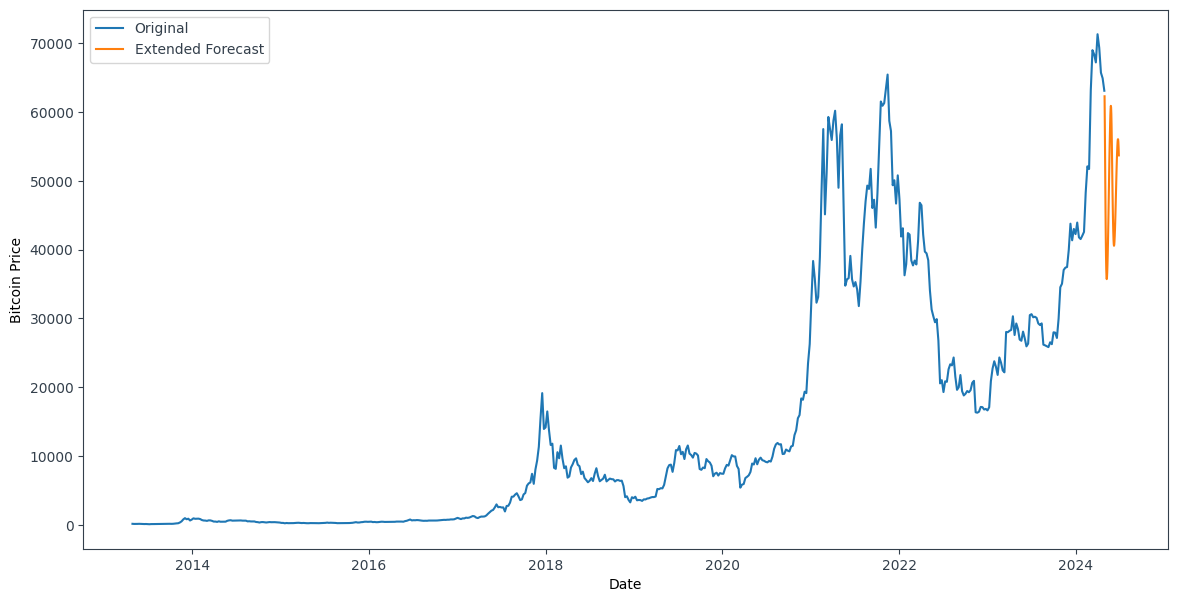

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Filter the data for Bitcoin
bitcoin_data = data_sorted[data_sorted['Name'] == 'Bitcoin']

# Extract the 'Price' column
price_data = bitcoin_data['Price'].values

# Normalize the data
scaler = MinMaxScaler()
price_data_normalized = scaler.fit_transform(price_data.reshape(-1, 1))

# Define the number of previous time steps to consider for the LSTM model
n_steps = 30

# Create input features and target variable
X = []
y = []
for i in range(n_steps, len(price_data_normalized)):
    X.append(price_data_normalized[i-n_steps:i])
    y.append(price_data_normalized[i])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
last_sequence = X_test[-1]  # Get the last sequence from the testing set
forecast = []
for _ in range(60):  # Change the range to 60 for predicting 60 days
    next_prediction = model.predict(last_sequence.reshape(1, n_steps, 1))
    forecast.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])

# Inverse normalize the predictions
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate the future dates for the forecast
last_date = bitcoin_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)  # Change the periods to 60

# Plot the original data and the extended forecast
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], price_data, label='Original')
plt.plot(future_dates, forecast, label='Extended Forecast')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()